# Clustering

<!--<badge>--><a href="https://colab.research.google.com/github/TheAIDojo/Machine_Learning_Bootcamp/blob/main/Week 04 - Advance Machine Learning/4- KMean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->



Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

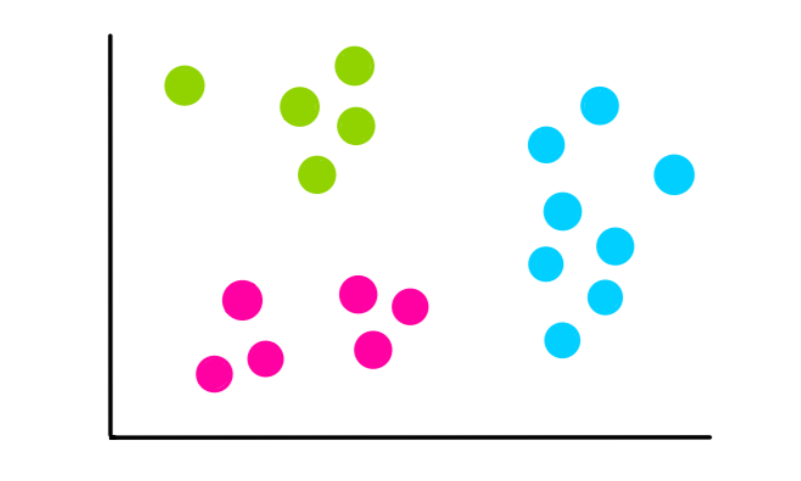 

# K Mean
k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.


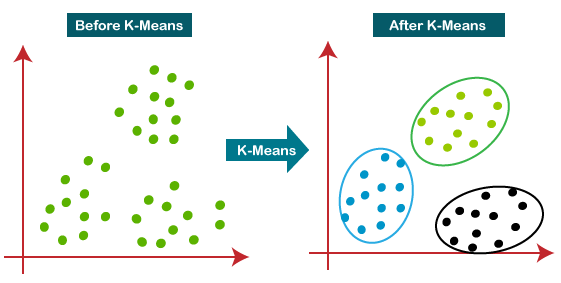

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster, datasets, metrics
import seaborn as se
import tqdm

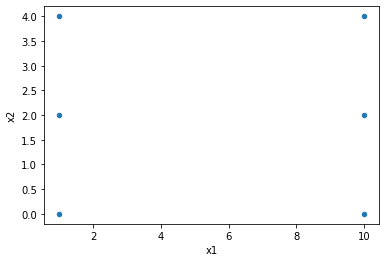

In [ ]:
# dataset
x = pd.DataFrame(
    np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]]), columns=["x1", "x2"]
)
# plot the dataset
x.plot.scatter("x1", "x2")

In [ ]:
# Create the kmean cluster
kmeans = cluster.KMeans(n_clusters=2, random_state=42)

# fit the kmean on the dataset
kmeans.fit(x)

# print the clusters
print(f"the cluster in the dataset are: {kmeans.labels_}")

# get the cluster centers
print(f"get the cluster centers: \n{kmeans.cluster_centers_}")

# Predict the clisters for the new simples
print(f"Kmean Prediction: {kmeans.predict([[0, 0], [12, 3]])}")

the cluster in the dataset are: [1 1 1 0 0 0]
get the cluster centers: 
[[10.  2.]
 [ 1.  2.]]
Kmean Prediction: [1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


**Note:** that you have to specify the number of clusters k that the algorithm must find.
In this example, it is pretty obvious from looking at the data that k should be set to 2,
but in general it is not that easy. We will discuss this shortly.
Each instance was assigned to one of the 2 clusters. In the context of clustering, an
instance’s label is the index of the cluster that this instance gets assigned to by the
**algorithm:** this is not to be confused with the class labels in classification (remember
that clustering is an unsupervised learning task). The KMeans instance preserves a
copy of the labels of the instances it was trained on, available via the labels_ instance.


In [ ]:
# Add the clusters to the dataset
# You can easily assign new instances to the cluster whose centroid is closest:
x["clusters"] = kmeans.labels_

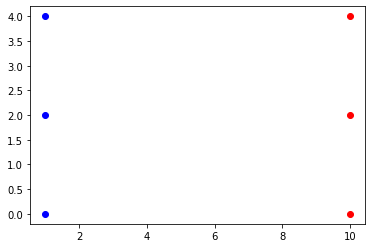

In [ ]:
# plot the dataset with clusters
cluster_0 = x[x.clusters == 0]  # Get the features for the cluster 0
cluster_1 = x[x.clusters == 1]  # Get the features for the cluster 1
plt.scatter(cluster_0.x1, cluster_0.x2, color="r")
plt.scatter(cluster_1.x1, cluster_1.x2, color="b")

# The K-Means Algorithm

**So, how does the algorithm work?** 

Well, suppose you were given the centroids. You
could easily label all the instances in the dataset by assigning each of them to the cluster whose centroid is closest. Conversely, if you were given all the instance labels, you could easily locate all the centroids by computing the mean of the instances for eachcluster. 

But you are given neither the labels nor the centroids, **so how can you proceed?** 

Well, just start by placing the centroids randomly (e.g., by picking k instances at random and using their locations as centroids). 

Then label the instances, update the
centroids, label the instances, update the centroids, and so on until the centroids stop moving. 

The algorithm is guaranteed to converge in a finite number of steps (usually quite small); it will not oscillate forever.2
You can see the algorithm in action: the centroids are initialized randomly (top left), then the instances are labeled (top right), then the centroids are
updated (center left), the instances are relabeled (center right), and so on. As you can see, in just three iterations, the algorithm has reached a clustering that seems close to
optimal.

**Note:**
The computational complexity of the algorithm is generally linear
with regard to the number of instances m, the number of clusters k,
and the number of dimensions n. However, this is only true when
the data has a clustering structure. If it does not, then in the worstcase scenario the complexity can increase exponentially with the
number of instances. In practice, this rarely happens, and K-Means
is generally one of the fastest clustering algorithms.

# Finding the optimal number of clusters
So far, we have set the number of clusters k to 2 because it was obvious by looking at
the data that this was the correct number of clusters. But in general, it will not be so
easy to know how to set k, and the result might be quite bad if you set it to the wrong
value. As you can see in below, setting k to 3 or 8 results in fairly bad models.

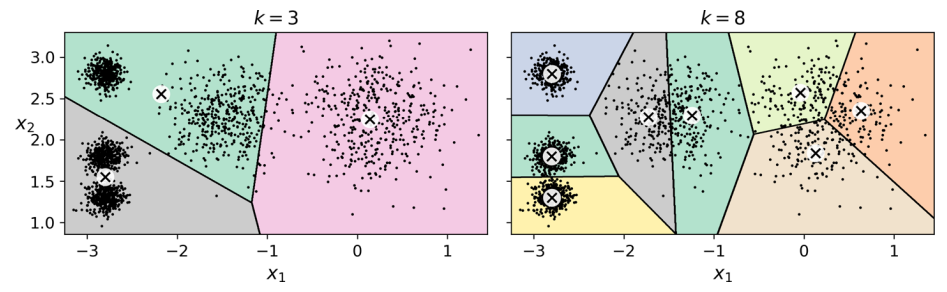

# Let's Work with Really Dataset

In [ ]:
# Get the dataset
iris_dataset = datasets.load_iris()
# Create dataframe from the dataset
dataset = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


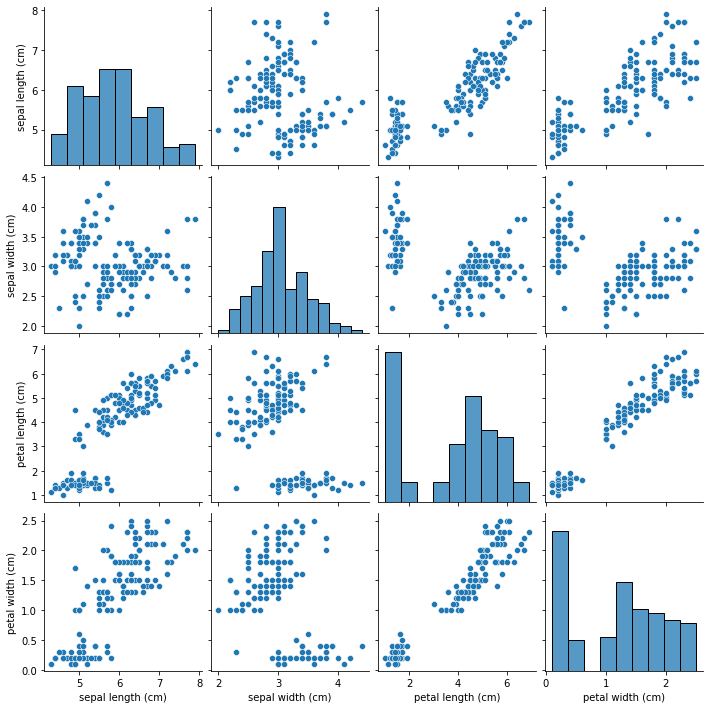

In [ ]:
# Plot the dataset as pairs
se.pairplot(dataset)

In [ ]:
# Create the kmean cluster
kmeans = cluster.KMeans(n_clusters=3, random_state=42)

# fit the kmean on the dataset
kmeans.fit(dataset)

# print the clusters
print(f"the cluster in the dataset are: {kmeans.labels_}")

# get the cluster centers
print(f"get the cluster centers: \n{kmeans.cluster_centers_}")

# Predict the clisters for the new simples
print(f"Kmean Prediction: {kmeans.predict([[6.7,3.0	,1.4,0.2]])}")

the cluster in the dataset are: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
get the cluster centers: 
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
Kmean Prediction: [1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Add the clusters to the dataset
# You can easily assign new instances to the cluster whose centroid is closest:
dataset["clusters"] = kmeans.labels_
# get the features for the clusters
cluster_0 = dataset[dataset.clusters == 0]  # Get the features for the cluster 0
cluster_1 = dataset[dataset.clusters == 1]  # Get the features for the cluster 1
cluster_2 = dataset[dataset.clusters == 2]  # Get the features for the cluster 2

Text(0, 0.5, 'petal width (cm)')

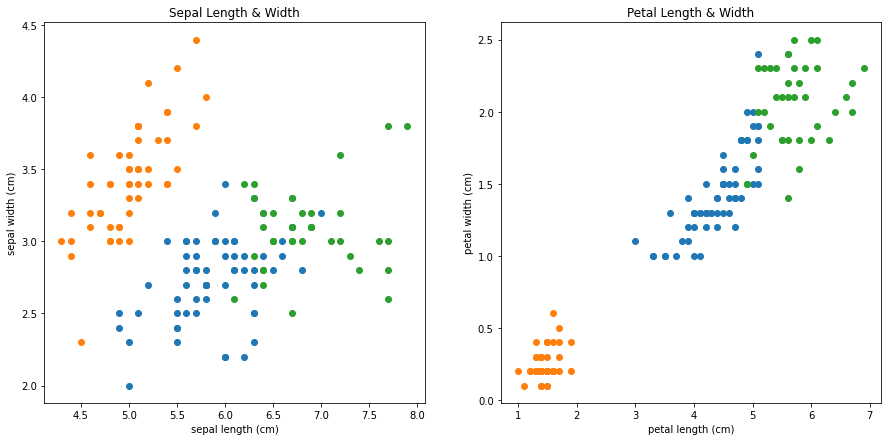

In [ ]:
# plot the dataset with clusters

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.title("Sepal Length & Width")
plt.scatter(cluster_0["sepal length (cm)"], cluster_0["sepal width (cm)"])
plt.scatter(cluster_1["sepal length (cm)"], cluster_1["sepal width (cm)"])
plt.scatter(cluster_2["sepal length (cm)"], cluster_2["sepal width (cm)"])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")


plt.subplot(1, 2, 2)
plt.title("Petal Length & Width")
plt.scatter(cluster_0["petal length (cm)"], cluster_0["petal width (cm)"])
plt.scatter(cluster_1["petal length (cm)"], cluster_1["petal width (cm)"])
plt.scatter(cluster_2["petal length (cm)"], cluster_2["petal width (cm)"])
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

# Finding the Optimal Number of Clusters
So far, we have set the number of clusters k to 3 because it was obvious by looking at
the data that this was the correct number of clusters. But in general, it will not be so
easy to know how to set k, and the result might be quite bad if you set it to the wrong value. As you can see in Figure , setting k to 3 or 8 results in fairly bad models.

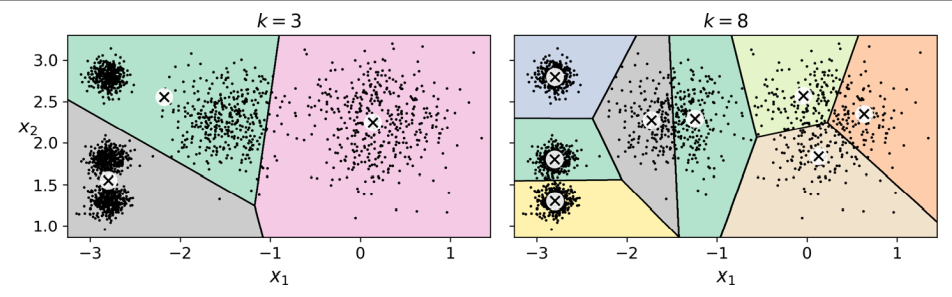

You might be thinking that we could just pick the model with the lowest inertia,
right? Unfortunately, it is not that simple. The inertia for k=3 is 653.2, which is much
higher than for k=5 (which was 211.6). But with k=8, the inertia is just 119.1. The
inertia is not a good performance metric when trying to choose k because it keeps
getting lower as we increase k. Indeed, the more clusters there are, the closer each
instance will be to its closest centroid, and therefore the lower the inertia will be. Let’s
plot the inertia as a function of k

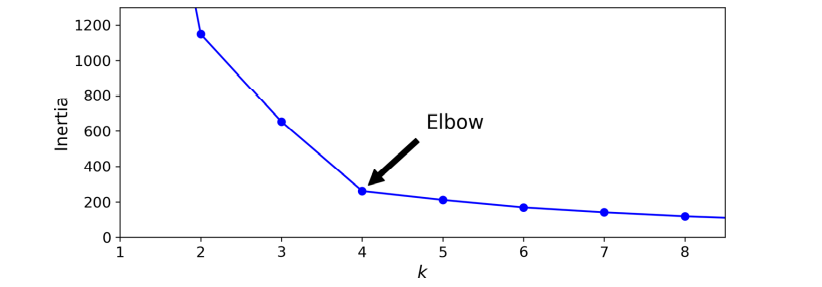

As you can see, the inertia drops very quickly as we increase k up to 4, but then it
decreases much more slowly as we keep increasing k. This curve has roughly the
shape of an arm, and there is an “elbow” at k = 4. So, if we did not know better, 4
would be a good choice: any lower value would be dramatic, while any higher value
would not help much, and we might just be splitting perfectly good clusters in half for
no good reason.
This technique for choosing the best value for the number of clusters is rather coarse.
A more precise approach (but also more computationally expensive) is to use the
silhouette score, which is the mean silhouette coefficient over all the instances. An instance’s silhouette coefficient is equal to (b – a) / max(a, b), where a is the mean
distance to the other instances in the same cluster (i.e., the mean intra-cluster dis‐
tance) and b is the mean nearest-cluster distance (i.e., the mean distance to the
instances of the next closest cluster, defined as the one that minimizes b, excluding
the instance’s own cluster). The silhouette coefficient can vary between –1 and +1. A
coefficient close to +1 means that the instance is well inside its own cluster and far
from other clusters, while a coefficient close to 0 means that it is close to a cluster
boundary, and finally a coefficient close to –1 means that the instance may have been
assigned to the wrong cluster.
To compute the silhouette score, you can use Scikit-Learn’s `silhouette_score()`
function, giving it all the instances in the dataset and the labels they were assigned:



```
>>> from sklearn.metrics import silhouette_score
>>> silhouette_score(X, kmeans.labels_)

```




## Get the dataset 

In [ ]:
# Get the dataset
iris_dataset = datasets.load_iris()
# Create dataframe from the dataset
dataset = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


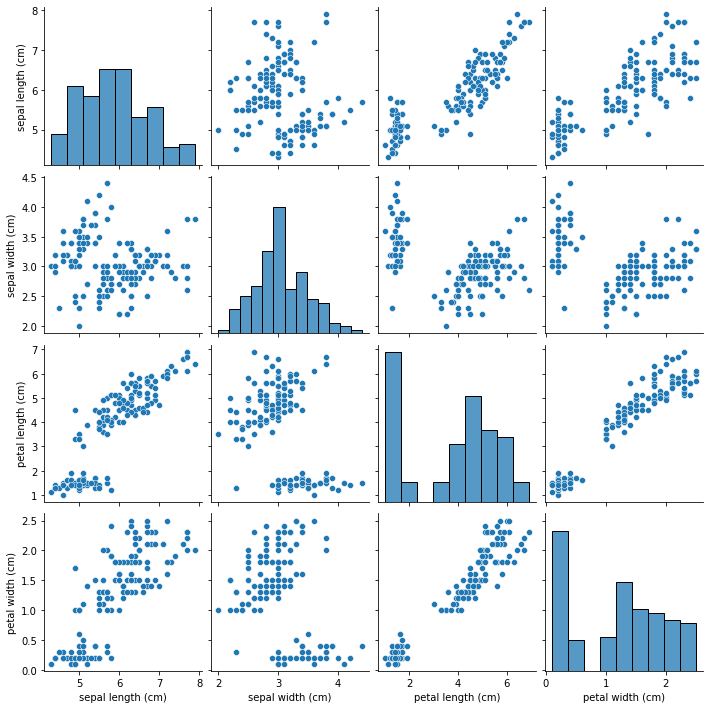

In [ ]:
# Plot the dataset as pairs
se.pairplot(dataset)

## silhouette_score

Compute the mean Silhouette Coefficient of all samples.

The Silhouette Coefficient is calculated using the mean intra-cluster distance `(a)` and the mean nearest-cluster distance `(b)` for each sample. The Silhouette Coefficient for a sample is `(b - a) / max(a, b)`. To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is:
```
2 <= n_labels <= n_samples - 1.
```


This function returns the mean Silhouette Coefficient over all samples. 

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [ ]:
# Create the kmean cluster
silhouette_score_list = {}
for k in tqdm.tqdm(range(2, 10)):
    # Create the kmeans cluster
    kmeans = cluster.KMeans(n_clusters=k, random_state=42)
    # Fit the kmeans cluster on the features
    kmeans.fit(dataset)
    # Add the k as key and silhouette_score as value to the silhouette_score_list dictionary
    silhouette_score_list[k] = metrics.silhouette_score(dataset, kmeans.labels_)

100%|██████████| 8/8 [00:00<00:00,  8.79it/s]


Text(0, 0.5, 'silhouette_score')

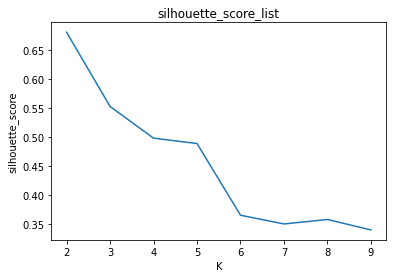

In [ ]:
# Plot the silhouette_score_list dictionary

plt.title("silhouette_score_list")
plt.plot(list(silhouette_score_list.keys()), list(silhouette_score_list.values()))
plt.xlabel("K")
plt.ylabel("silhouette_score")

As you can see, this visualization is much richer than the previous one: although it
confirms that k = 3 is a very good choice, it also underlines the fact that k = 4 is quite
good as well, and much better than k = 6 or 7.

# Accelerated K-Means and Mini-Batch K-Means
Another important improvement to the K-Means algorithm was proposed in a 2003
paper by Charles Elkan.4
 It considerably accelerates the algorithm by avoiding many
unnecessary distance calculations. Elkan achieved this by exploiting the triangle
inequality (i.e., that a straight line is always the shortest distance between two points5
)
and by keeping track of lower and upper bounds for distances between instances and
centroids. This is the algorithm the KMeans class uses by default (you can force it to
use the original algorithm by setting the algorithm hyperparameter to "full",
although you probably will never need to).
Yet another important variant of the K-Means algorithm was proposed in a 2010
paper by David Sculley.6
 Instead of using the full dataset at each iteration, the algo‐
rithm is capable of using mini-batches, moving the centroids just slightly at each iter‐
ation. This speeds up the algorithm typically by a factor of three or four and makes it
possible to cluster huge datasets that do not fit in memory. Scikit-Learn implements
this algorithm in the MiniBatchKMeans class.



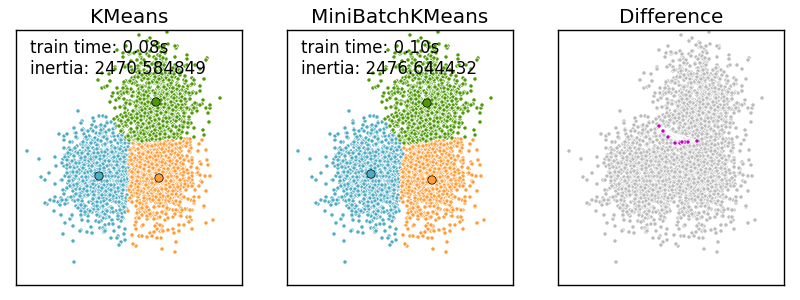

## Get the dataset 

In [ ]:
# Get the dataset
iris_dataset = datasets.load_iris()
# Create dataframe from the dataset
dataset = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


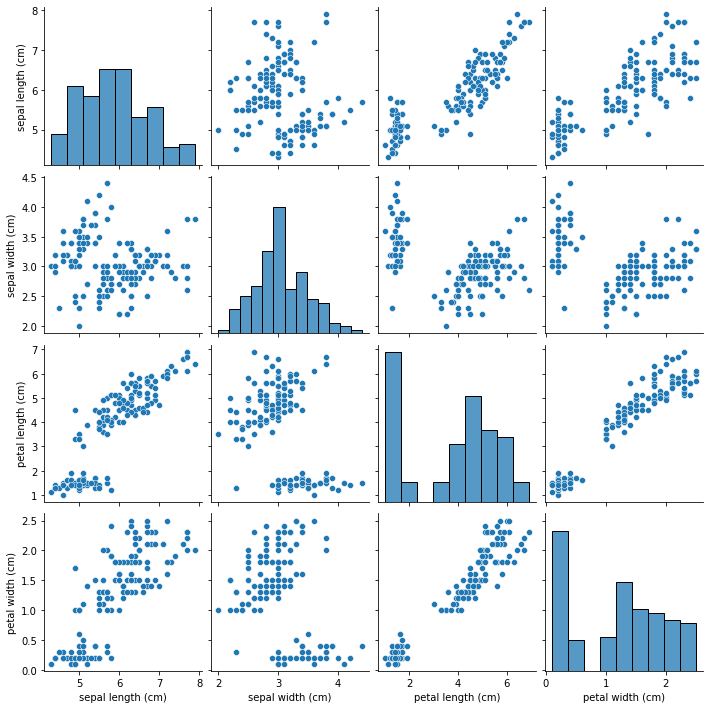

In [ ]:
# Plot the dataset as pairs
se.pairplot(dataset)

In [ ]:
# Create the Mini Batch KMeans cluster
silhouette_score_list = {}
for k in tqdm.tqdm(range(2, 10)):
    # Create the Mini Batch KMeans cluster
    kmeans = cluster.MiniBatchKMeans(n_clusters=k, random_state=42)
    # Fit the kmeans cluster on the features
    kmeans.fit(dataset)
    # Add the k as key and silhouette_score as value to the silhouette_score_list dictionary
    silhouette_score_list[k] = metrics.silhouette_score(dataset, kmeans.labels_)

100%|██████████| 8/8 [00:00<00:00, 31.90it/s]


Text(0, 0.5, 'silhouette_score')

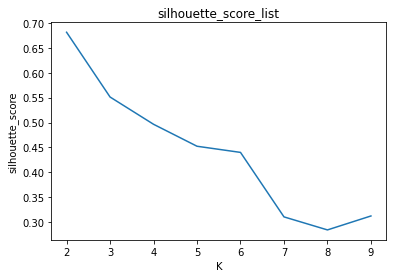

In [ ]:
# Plot the silhouette_score_list dictionary

plt.title("silhouette_score_list")
plt.plot(list(silhouette_score_list.keys()), list(silhouette_score_list.values()))
plt.xlabel("K")
plt.ylabel("silhouette_score")

As you can see, this visualization is much richer than the previous one: although it
confirms that k = 3 is a very good choice, it also underlines the fact that k = 4 is quite
good as well, and much better than k = 6 or 7.

In [ ]:
# Create the Mini Batch KMeans n_clusters = 3
kmeans = cluster.MiniBatchKMeans(n_clusters=3, random_state=42)
# Fit the Mini Batch KMeans cluster on the features
kmeans.fit(dataset)
# print the clusters
print(f"the cluster in the dataset are: {kmeans.labels_}")

# get the cluster centers
print(f"get the cluster centers: \n{kmeans.cluster_centers_}")

# Predict the clisters for the new simples
print(f"Kmean Prediction: {kmeans.predict([[6.7,3.0	,1.4,0.2]])}")

the cluster in the dataset are: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
get the cluster centers: 
[[5.86663366 2.72514851 4.35811881 1.41633663]
 [5.00406593 3.42021978 1.46615385 0.23791209]
 [6.80987179 3.05974359 5.68230769 2.05384615]]
Kmean Prediction: [1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Add the clusters to the dataset
# You can easily assign new instances to the cluster whose centroid is closest:
dataset["clusters"] = kmeans.labels_
# get the features for the clusters
cluster_0 = dataset[dataset.clusters == 0]  # Get the features for the cluster 0
cluster_1 = dataset[dataset.clusters == 1]  # Get the features for the cluster 1
cluster_2 = dataset[dataset.clusters == 2]  # Get the features for the cluster 2

Text(0, 0.5, 'petal width (cm)')

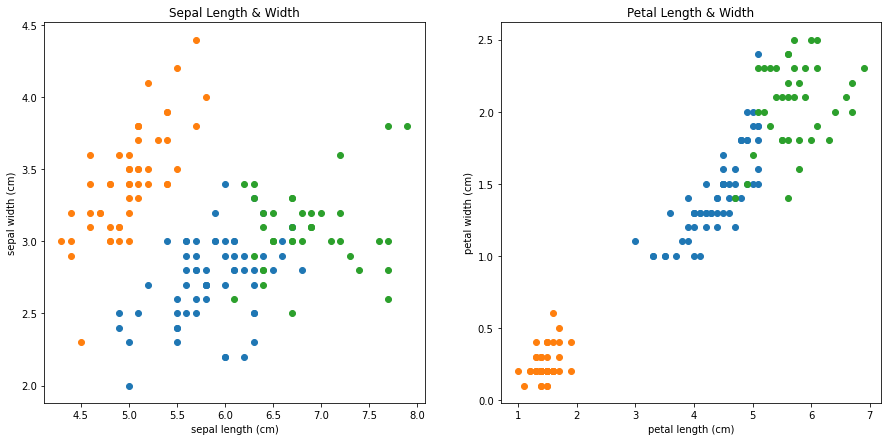

In [ ]:
# plot the dataset with clusters

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.title("Sepal Length & Width")
plt.scatter(cluster_0["sepal length (cm)"], cluster_0["sepal width (cm)"])
plt.scatter(cluster_1["sepal length (cm)"], cluster_1["sepal width (cm)"])
plt.scatter(cluster_2["sepal length (cm)"], cluster_2["sepal width (cm)"])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")


plt.subplot(1, 2, 2)
plt.title("Petal Length & Width")
plt.scatter(cluster_0["petal length (cm)"], cluster_0["petal width (cm)"])
plt.scatter(cluster_1["petal length (cm)"], cluster_1["petal width (cm)"])
plt.scatter(cluster_2["petal length (cm)"], cluster_2["petal width (cm)"])
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

# Limits of K-Means
Despite its many merits, most notably being fast and scalable, K-Means is not perfect.
As we saw, it is necessary to run the algorithm several times to avoid suboptimal solu‐
tions, plus you need to specify the number of clusters, which can be quite a hassle.
Moreover, K-Means does not behave very well when the clusters have varying sizes different densities, or nonspherical shapes. For example, Figure shows how KMeans clusters a dataset containing three ellipsoidal clusters of different dimensions,
densities, and orientations.

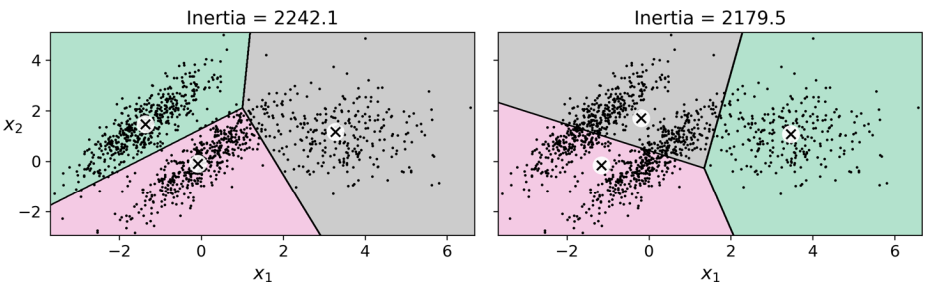

As you can see, neither of these solutions is any good. The solution on the left is bet‐
ter, but it still chops off 25% of the middle cluster and assigns it to the cluster on the
right. The solution on the right is just terrible, even though its inertia is lower. So,
depending on the data, different clustering algorithms may perform better. On these
types of elliptical clusters, Gaussian mixture models work great.

**Note:** It is important to scale the input features before you run K-Means,
or the clusters may be very stretched and K-Means will perform
poorly. Scaling the features does not guarantee that all the clusters
will be nice and spherical, but it generally improves things.